<a href="https://colab.research.google.com/github/avillag/Data-110/blob/main/AVillagran_week_5_Python_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# View the first few rows of the dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#**Part 1: Understanding the DataSet**


# **Part 2: Fare and Survival Anaylsis**

## Task 2. Fare Distrubtion

Most passengers had a fare that was less than $100.00. There are some outliers, such as some fare prices being $500. Analyzing only the fare price makes it difficult to draw conclusions for survival rates.

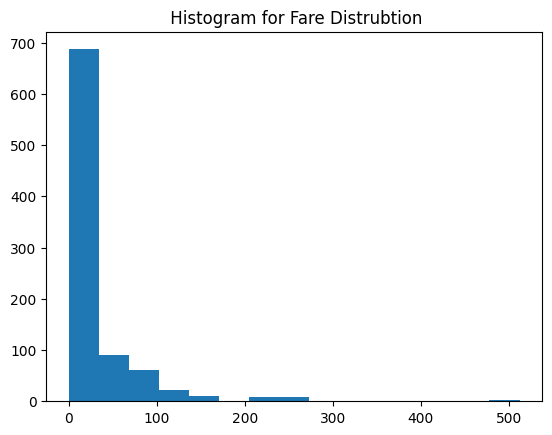

In [42]:
plt.hist(titanic['fare'],bins=15)
plt.title(' Histogram for Fare Distrubtion')
plt.show()

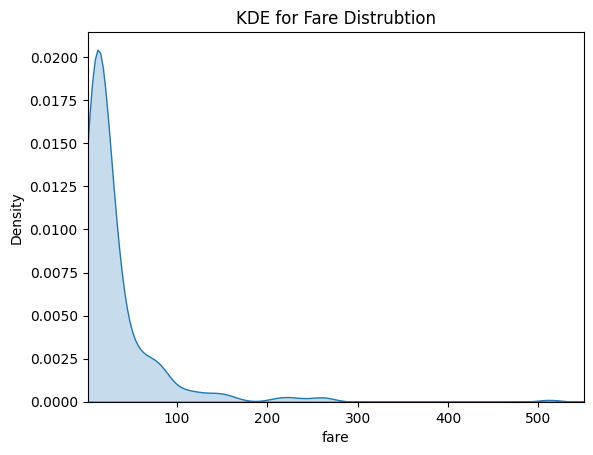

In [41]:
sns.kdeplot(titanic['fare'],fill=True)
plt.title('KDE for Fare Distrubtion')
plt.xlim(1,550)
plt.show()

## Task 3: Fare and Survival Rates
Yes, fares seem to have influenced survival. The distribution suggests that there are more non-survivors with lower fares.

In [72]:
survivors = titanic[titanic['survived'] == 1]['fare']
survivors.head()


,fare
1,71.2833
2,7.9250
3,53.1000
8,11.1333
9,30.0708


In [73]:
non_survivors = titanic[titanic['survived'] == 0]['fare']
non_survivors.head()


,fare
0,7.2500
4,8.0500
5,8.4583
6,51.8625
7,21.0750


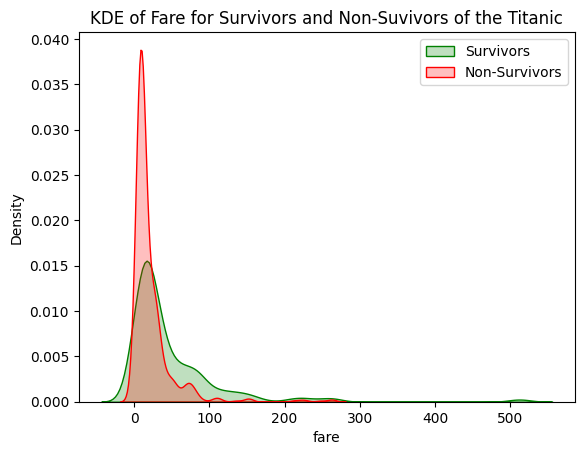

In [80]:
sns.kdeplot(survivors,bw_adjust=0.7, fill=True, color="green", label="Survivors")
sns.kdeplot(non_survivors,bw_adjust=0.7, fill=True, color="red", label="Non-Survivors")

plt.title('KDE of Fare for Survivors and Non-Suvivors of the Titanic')
plt.legend()

plt.show()

# **Part 3: Class, Fare, and Survival Insights**

## Task 4: Passenger Class, fare and Survival

In [116]:
pclass_1_fare = titanic[titanic['pclass'] == 1]['fare']
pclass_1_fare.head()


,fare
1,71.2833
3,53.1000
6,51.8625
11,26.5500
23,35.5000


In [117]:
pclass_2_fare = titanic[titanic['pclass'] == 2]['fare']
pclass_2_fare.head()


,fare
9,30.0708
15,16.0000
17,13.0000
20,26.0000
21,13.0000


In [118]:
pclass_3_fare = titanic[titanic['pclass'] == 3]['fare']
pclass_3_fare.head()


,fare
0,7.2500
2,7.9250
4,8.0500
5,8.4583
7,21.0750


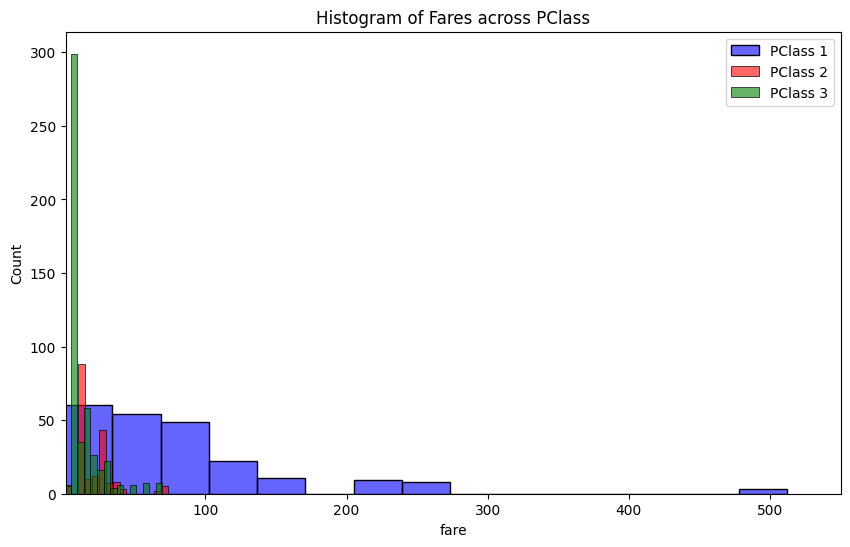

In [130]:
plt.figure(figsize=(10,6))
sns.histplot(pclass_1_fare, color="blue", label="PClass 1", bins=15, alpha=0.6)
sns.histplot(pclass_2_fare, color="red", label="PClass 2", bins=15,alpha=0.6)
sns.histplot(pclass_3_fare,color="green", label="PClass 3", bins=15,alpha=0.6)




plt.title('Histogram of Fares across PClass')
plt.xlim(1,550)
plt.legend()

plt.show()

In [150]:
pclass = titanic[(titanic['survived'] == 0)][['pclass']]
pclass.head()


,pclass
0,3
4,3
5,3
6,1
7,3


In [152]:
pclass1_non_survivors =(pclass['pclass']==1)
pclass1_non_survivors.head()

,pclass
0,False
4,False
5,False
6,True
7,False


In [ ]:
pclass1_non_survivors =(pclass['pclass']==1)
pclass1_non_survivors.head()

# **Part 4: Age and Survival**

## Task 5: Age of Survivors and Non survivors

The KDE shows that passengers who were younger had higher survival rates.

In [153]:
survivors = titanic[titanic['survived'] == 1]['age']
survivors.head()

,age
1,38.0
2,26.0
3,35.0
8,27.0
9,14.0


In [154]:
non_survivors = titanic[titanic['survived'] == 0]['age']
non_survivors.head()

,age
0,22.0
4,35.0
5,NaN
6,54.0
7,2.0


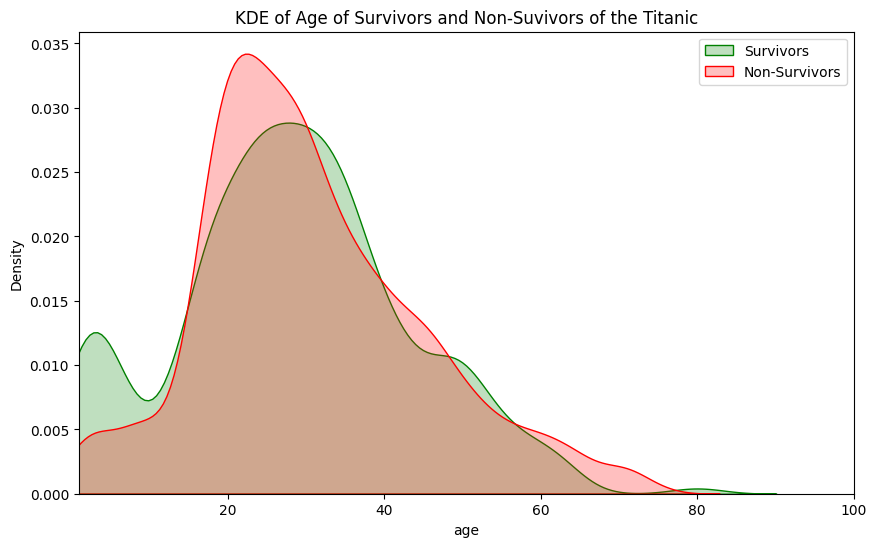

In [158]:
plt.figure(figsize=(10,6))
sns.kdeplot(survivors,bw_adjust=0.7, fill=True, color="green", label="Survivors")
sns.kdeplot(non_survivors,bw_adjust=0.7, fill=True, color="red", label="Non-Survivors")

plt.title('KDE of Age of Survivors and Non-Suvivors of the Titanic')
plt.legend()
plt.xlim(1,100)


plt.show()

## Task 6: Pyramid Histogram for Age Survival by Sex
From the distribution, you can see the most stark difference in non-survivors. On average, there were fewer female non-survivors than males. When comparing age differences, it seems that age groups have similar survival rates.

In [223]:
male_survivors = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == 1)]['age'].dropna()
male_survivors.head()


,age
21,34.00
23,28.00
74,32.00
78,0.83
81,29.00


In [222]:
male_nonsurvivors = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == 0)]['age'].dropna()
male_nonsurvivors.head()

,age
0,22.0
4,35.0
6,54.0
7,2.0
12,20.0


In [220]:
female_survivors = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == 1)]['age'].dropna()
female_survivors.head()

,age
21,34.00
23,28.00
74,32.00
78,0.83
81,29.00


In [221]:
female_nonsurvivors = titanic[(titanic['sex'] == 'female') & (titanic['survived'] == 0)]['age'].dropna()
female_nonsurvivors.head()

,age
14,14.0
18,31.0
24,8.0
38,18.0
40,40.0


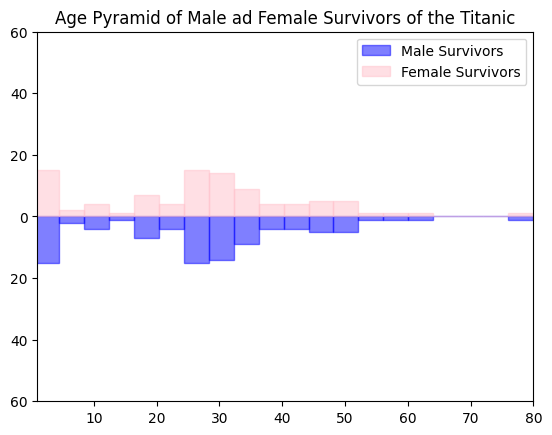

In [254]:
plt.hist(male_survivors, bins=20, label='Male Survivors', alpha=0.5, color='blue', edgecolor='blue',
         orientation='vertical', weights=[-1] * len(male_survivors))

plt.hist(female_survivors, bins=20, label='Female Survivors', alpha=0.5, color='pink',
         orientation='vertical',edgecolor='pink')

plt.title('Age Pyramid of Male ad Female Survivors of the Titanic')

plt.yticks([-60,-40,-20,0,20,40,60],[60,40,20,0,20,40,60])
plt.xlim(1,80)
plt.legend()


plt.show()


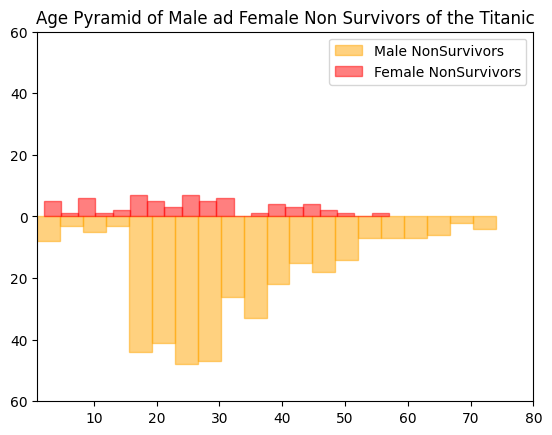

In [261]:
plt.hist(male_nonsurvivors, bins=20, label='Male NonSurvivors', alpha=0.5, color='orange', edgecolor='orange',
         orientation='vertical', weights=[-1] * len(male_nonsurvivors))

plt.hist(female_nonsurvivors, bins=20, label='Female NonSurvivors', alpha=0.5, color='red',edgecolor='red',
         orientation='vertical')
plt.title('Age Pyramid of Male ad Female Non Survivors of the Titanic')

plt.yticks([-60,-40,-20,0,20,40,60],[60,40,20,0,20,40,60])
plt.xlim(1,80)
plt.legend()


plt.show()